Data Shape for subject1: data_PPG - (280000,), data_BP - (6,)


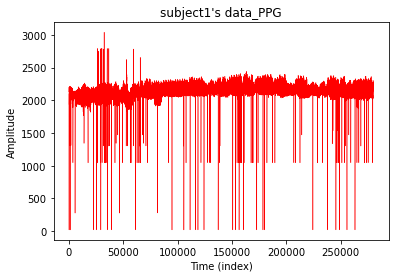

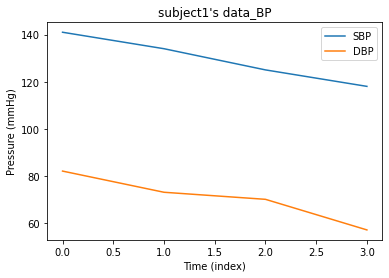

Data Shape for subject 10: data_PPG - (299000,), data_BP - (4,)


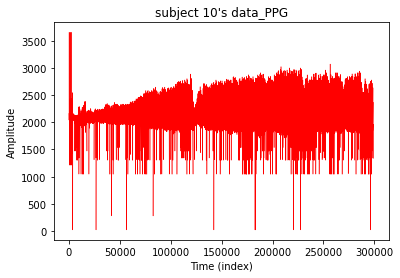

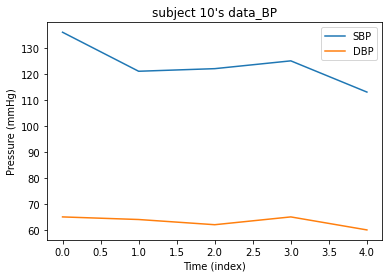

Data Shape for subject11: data_PPG - (225000,), data_BP - (5,)


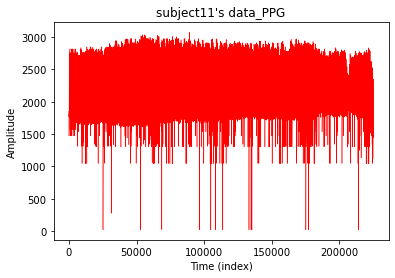

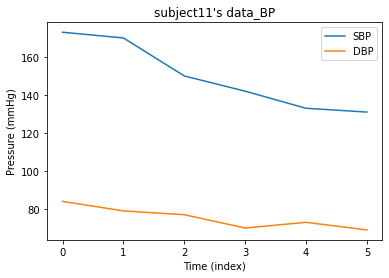

Data Shape for subject12: data_PPG - (387000,), data_BP - (6,)


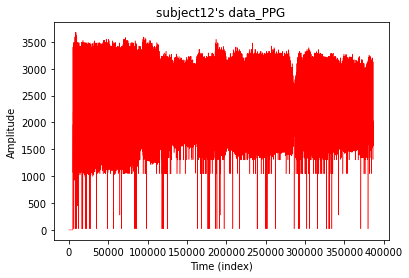

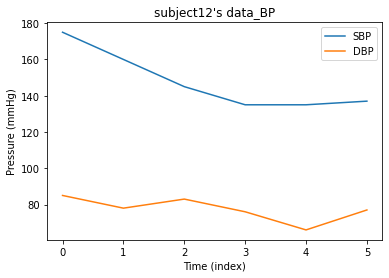

Data Shape for subject13: data_PPG - (404000,), data_BP - (6,)


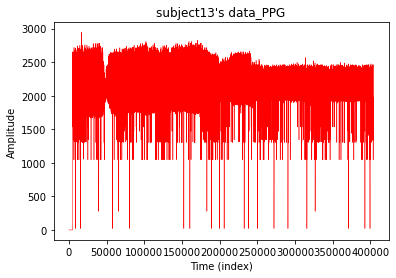

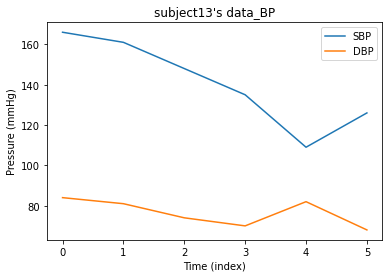

Data Shape for subject14: data_PPG - (413000,), data_BP - (6,)


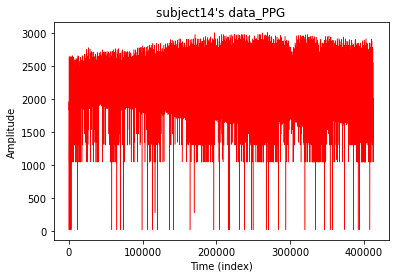

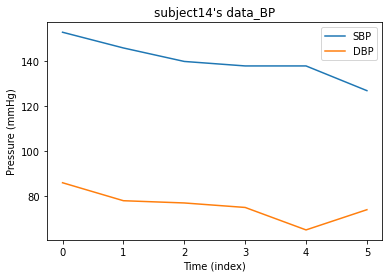

Data Shape for subject15: data_PPG - (355000,), data_BP - (6,)


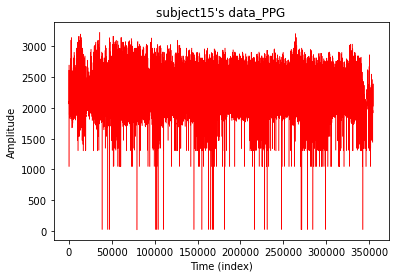

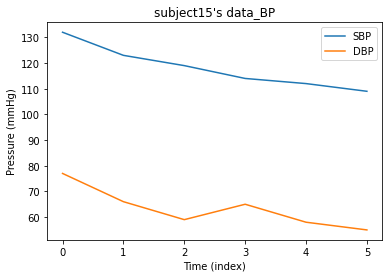

Data Shape for subject16: data_PPG - (396000,), data_BP - (6,)


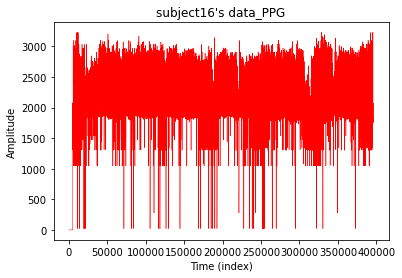

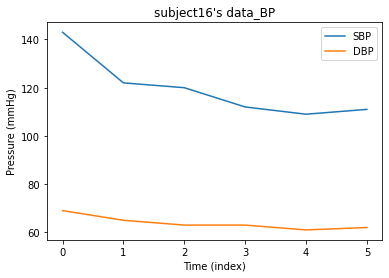

Data Shape for subject17: data_PPG - (346000,), data_BP - (6,)


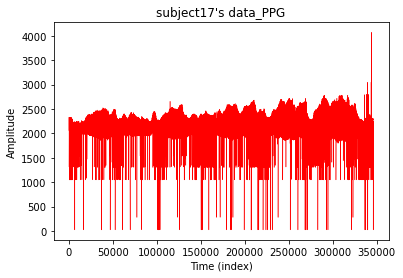

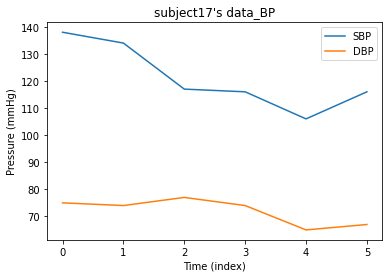

Data Shape for subject18: data_PPG - (346000,), data_BP - (6,)


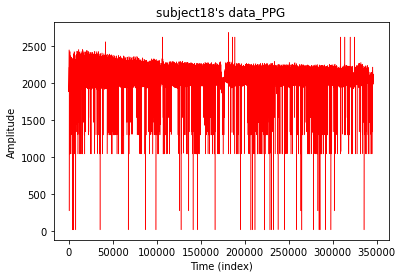

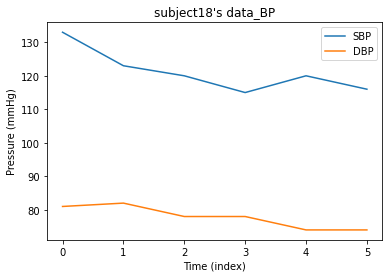

Data Shape for subject19: data_PPG - (383000,), data_BP - (6,)


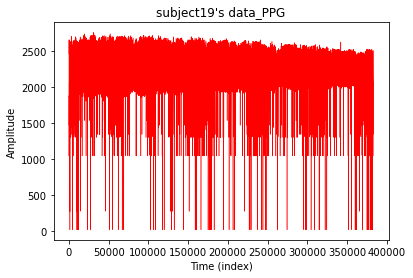

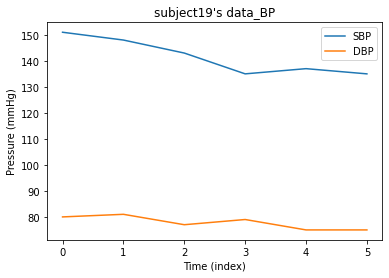

Data Shape for subject2: data_PPG - (356000,), data_BP - (6,)


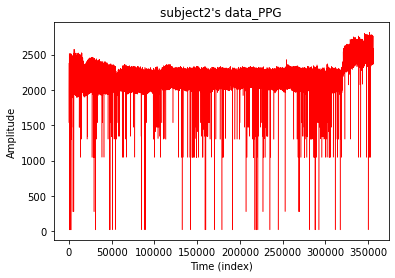

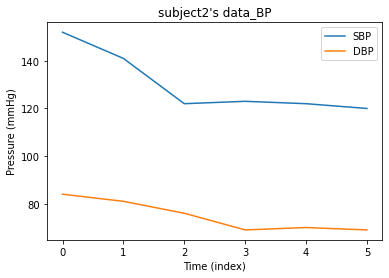

Data Shape for subject20: data_PPG - (393000,), data_BP - (6,)


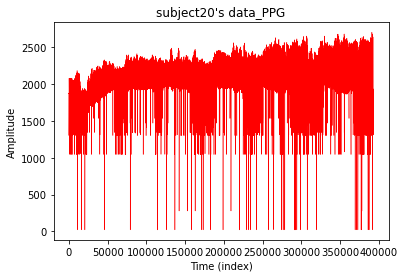

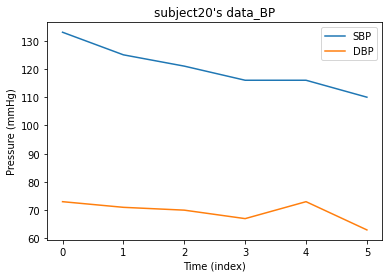

Data Shape for subject21: data_PPG - (398000,), data_BP - (6,)


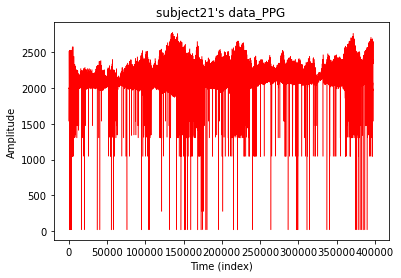

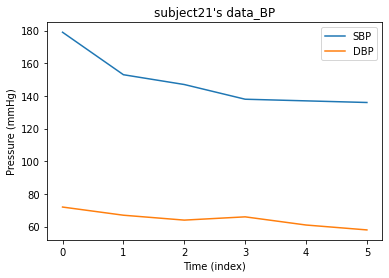

Data Shape for subject22: data_PPG - (518000,), data_BP - (6,)


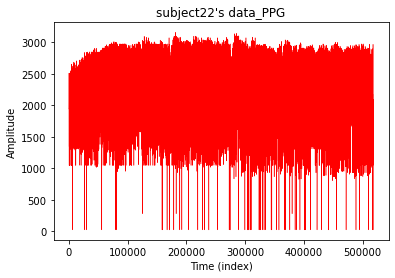

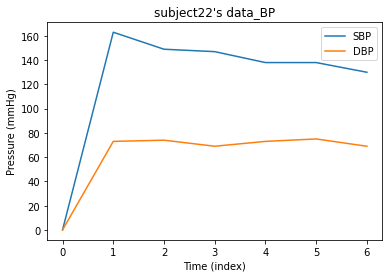

Data Shape for subject23: data_PPG - (312000,), data_BP - (7,)


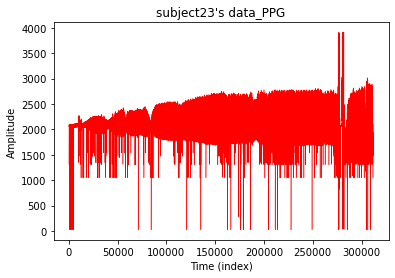

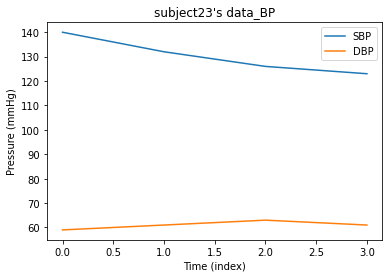

Data Shape for subject24: data_PPG - (313000,), data_BP - (4,)


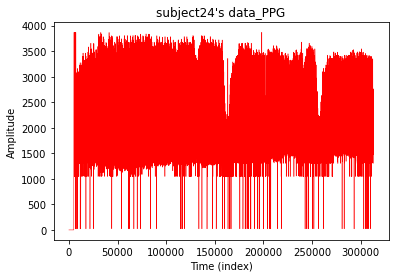

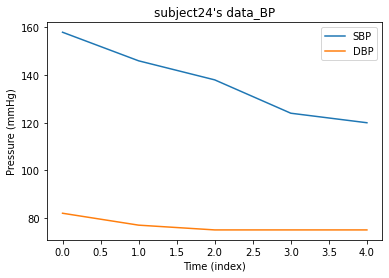

Data Shape for subject25: data_PPG - (358000,), data_BP - (5,)


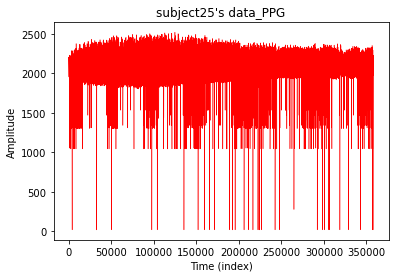

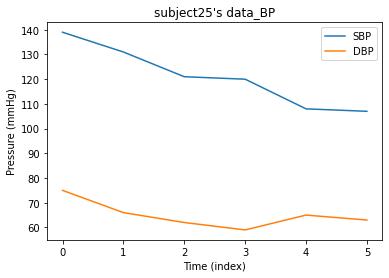

Data Shape for subject26: data_PPG - (361000,), data_BP - (6,)


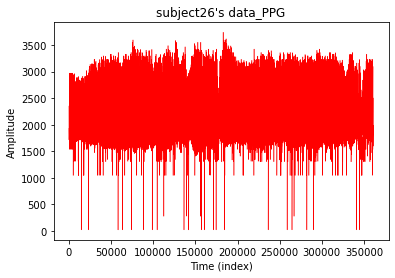

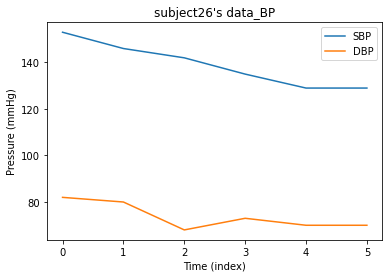

Data Shape for subject3: data_PPG - (346000,), data_BP - (6,)


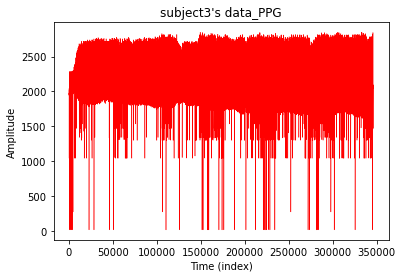

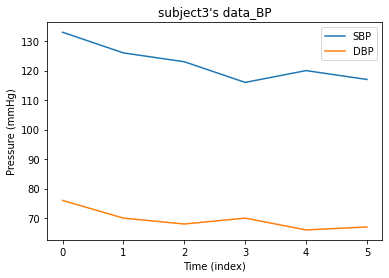

Data Shape for subject4: data_PPG - (555000,), data_BP - (6,)


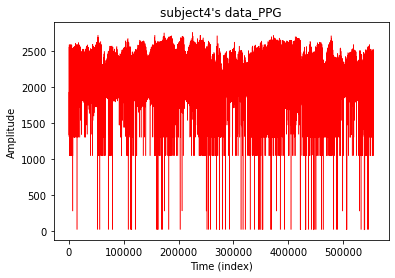

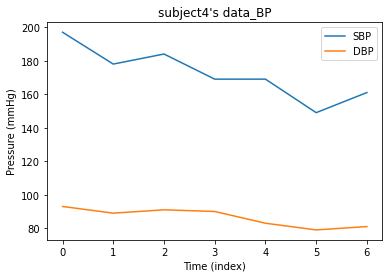

Data Shape for subject5: data_PPG - (509000,), data_BP - (7,)


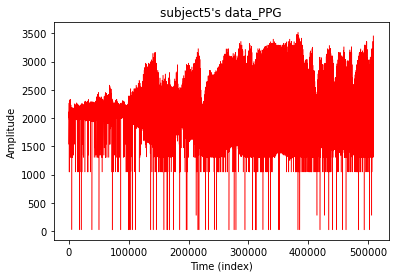

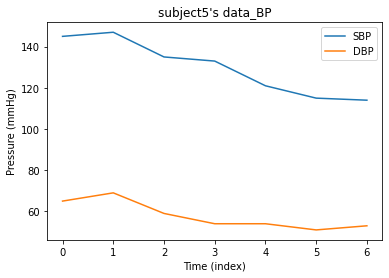

Data Shape for subject6: data_PPG - (270000,), data_BP - (7,)


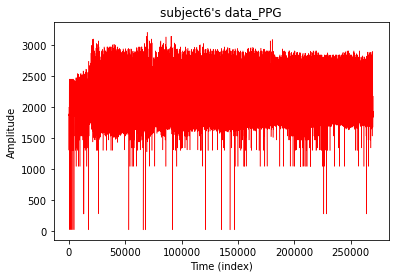

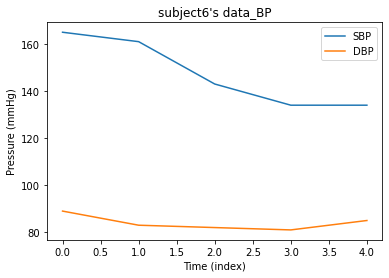

Data Shape for subject7: data_PPG - (479000,), data_BP - (5,)


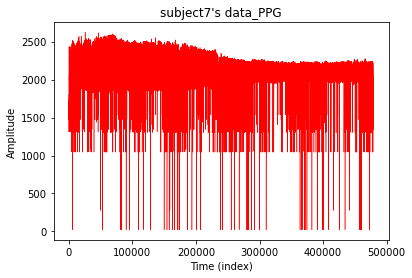

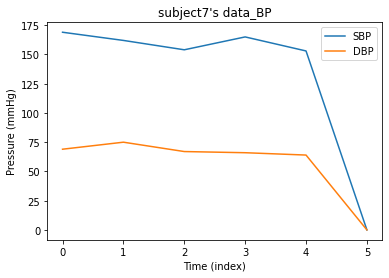

Data Shape for subject8: data_PPG - (438000,), data_BP - (6,)


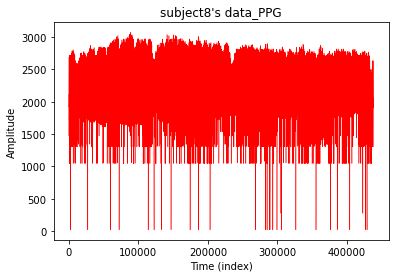

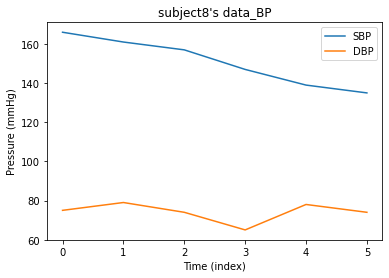

Data Shape for subject9: data_PPG - (342000,), data_BP - (6,)


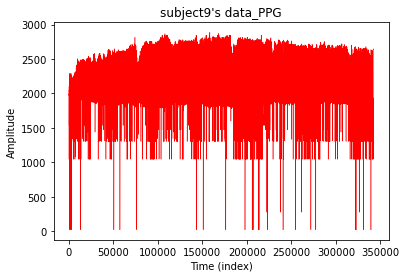

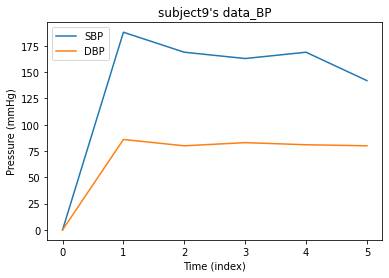

In [10]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


directory = "BP_Data/archive"   # Replace with the actual path to the directory containing the .json files

for filename in os.listdir(directory):
    if filename.endswith(".json"):
        file_path = os.path.join(directory, filename)
        with open(file_path, "r") as f:
            data = json.load(f)
            
            # Extract information from the data
            UID = data["UID"]
            age = data["age"]
            weight = data["weight"]
            height = data["height"]
            data_PPG = data["data_PPG"]
            data_BP = data["data_BP"]
            
            print(f"Data Shape for {UID}: data_PPG - {np.array(data_PPG).shape}, data_BP - {np.array(SBP).shape}")

            # Plot the data_PPG
            plt.plot(data_PPG, color='red', linewidth=0.5)
            plt.title(f"{UID}'s data_PPG")
            plt.xlabel("Time (index)")
            plt.ylabel("Amplitude")
            plt.show()

            # Plot the data_BP
            SBP = [x["SBP"] for x in data_BP]
            DBP = [x["DBP"] for x in data_BP]
            plt.plot(SBP, label="SBP")
            plt.plot(DBP, label="DBP")
            plt.title(f"{UID}'s data_BP")
            plt.xlabel("Time (index)")
            plt.ylabel("Pressure (mmHg)")
            plt.legend()
            plt.show()





In [1]:
#XGboost
import json
import os
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Define the directory containing the JSON files
directory = "BP_Data//archive"

# Initialize the dataset for the XGBoost model
ppg_data = []
bp_data = []

# Set a maximum length for the PPG signal
max_length = 1000

for filename in os.listdir(directory):
    if filename.endswith(".json"):
        file_path = os.path.join(directory, filename)
        with open(file_path, "r") as f:
            data = json.load(f)

            # Extract information from the data
            UID = data["UID"]
            age = data["age"]
            weight = data["weight"]
            height = data["height"]
            data_PPG = data["data_PPG"]
            data_BP = data["data_BP"] 

            # Find the maximum length of the PPG signals
            max_length = max(max_length, len(data_PPG))

            # Pad the PPG signal to a fixed length
            padded_data_PPG = np.pad(data_PPG, (0, max_length - len(data_PPG)), 'constant')
            
            # Normalize the PPG signal
            normalized_data_PPG = (padded_data_PPG - np.mean(padded_data_PPG)) / np.std(padded_data_PPG)

            # Append the PPG signal and corresponding blood pressure values to the dataset
            ppg_data.append(normalized_data_PPG)
            SBP = [x["SBP"] for x in data_BP]
            DBP = [x["DBP"] for x in data_BP]
            bp_data.append(SBP[-1])  # only append the last blood pressure value in the sequence

# Pad all arrays to the same length
ppg_data = np.array([np.pad(x, (0, max_length - len(x)), 'constant') for x in ppg_data])
bp_data = np.array(bp_data)

# Reshape ppg_data to (ppg_data.shape[0], ppg_data.shape[1], 1)
#ppg_data = ppg_data.reshape((ppg_data.shape[0], ppg_data.shape[1], 1))

# Split the data into training and testing sets
train_size = int(0.8 * len(ppg_data))
X_train, X_test = ppg_data[:train_size], ppg_data[train_size:]
y_train, y_test = bp_data[:train_size], bp_data[train_size:]

# Train the XGBoost model
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=1000, learning_rate=0.1, max_depth=6, subsample=0.5)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 3058.901012064404


In [2]:
#linear regression
import json
import os
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the directory containing the JSON files
directory = "BP_Data//archive"

# Initialize the dataset for the linear regression model
ppg_data = []
bp_data = []

# Set a maximum length for the PPG signal
max_length = 1000

for filename in os.listdir(directory):
    if filename.endswith(".json"):
        file_path = os.path.join(directory, filename)
        with open(file_path, "r") as f:
            data = json.load(f)

            # Extract information from the data
            UID = data["UID"]
            age = data["age"]
            weight = data["weight"]
            height = data["height"]
            data_PPG = data["data_PPG"]
            data_BP = data["data_BP"] 

            # Find the maximum length of the PPG signals
            max_length = max(max_length, len(data_PPG))

            # Pad the PPG signal to a fixed length
            padded_data_PPG = np.pad(data_PPG, (0, max_length - len(data_PPG)), 'constant')
            
            # Normalize the PPG signal
            normalized_data_PPG = (padded_data_PPG - np.mean(padded_data_PPG)) / np.std(padded_data_PPG)

            # Append the PPG signal and corresponding blood pressure values to the dataset
            ppg_data.append(normalized_data_PPG)
            SBP = [x["SBP"] for x in data_BP]
            DBP = [x["DBP"] for x in data_BP]
            bp_data.append(SBP[-1])  # only append the last blood pressure value in the sequence

# Pad all arrays to the same length
ppg_data = np.array([np.pad(x, (0, max_length - len(x)), 'constant') for x in ppg_data])
bp_data = np.array(bp_data)

# Reshape ppg_data to (ppg_data.shape[0], ppg_data.shape[1], 1)
#ppg_data = ppg_data.reshape((ppg_data.shape[0], ppg_data.shape[1], 1))

# Split the data into training and testing sets
train_size = int(0.8 * len(ppg_data))
X_train, X_test = ppg_data[:train_size], ppg_data[train_size:]
y_train, y_test = bp_data[:train_size], bp_data[train_size:]

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 2895.2032547137023


In [4]:
#xgboost with adam opt 
#XGboost
import json
import os
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Define the directory containing the JSON files
directory = "BP_Data//archive"''

# Initialize the dataset for the XGBoost model
ppg_data = []
bp_data = []

# Set a maximum length for the PPG signal
max_length = 1000

for filename in os.listdir(directory):
    if filename.endswith(".json"):
        file_path = os.path.join(directory, filename)
        with open(file_path, "r") as f:
            data = json.load(f)

            # Extract information from the data
            UID = data["UID"]
            age = data["age"]
            weight = data["weight"]
            height = data["height"]
            data_PPG = data["data_PPG"]
            data_BP = data["data_BP"] 

            # Find the maximum length of the PPG signals
            max_length = max(max_length, len(data_PPG))

            # Pad the PPG signal to a fixed length
            padded_data_PPG = np.pad(data_PPG, (0, max_length - len(data_PPG)), 'constant')
            
            # Normalize the PPG signal
            normalized_data_PPG = (padded_data_PPG - np.mean(padded_data_PPG)) / np.std(padded_data_PPG)

            # Append the PPG signal and corresponding blood pressure values to the dataset
            ppg_data.append(normalized_data_PPG)
            SBP = [x["SBP"] for x in data_BP]
            DBP = [x["DBP"] for x in data_BP]
            bp_data.append(SBP[-1])  # only append the last blood pressure value in the sequence

# Pad all arrays to the same length
ppg_data = np.array([np.pad(x, (0, max_length - len(x)), 'constant') for x in ppg_data])
bp_data = np.array(bp_data)

# Split the data into training and testing sets
train_size = int(0.8 * len(ppg_data))
X_train, X_test = ppg_data[:train_size], ppg_data[train_size:]
y_train, y_test = bp_data[:train_size], bp_data[train_size:]

# Train the XGBoost model
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=1000, learning_rate=0.1, max_depth=6, subsample=0.5)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print("MSE:", mse)
print("R2 score:", r2)
print("Explained variance score:", evs)


MSE: 3058.901012064404
R2 score: -0.09056049392250198
Explained variance score: -0.08234802989750256


In [3]:
#linear regression with varience
import json
import os
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, explained_variance_score

# Define the directory containing the JSON files
directory = "BP_Data//archive"

# Initialize the dataset for the linear regression model
ppg_data = []
bp_data = []

# Set a maximum length for the PPG signal
max_length = 1000

for filename in os.listdir(directory):
    if filename.endswith(".json"):
        file_path = os.path.join(directory, filename)
        with open(file_path, "r") as f:
            data = json.load(f)

            # Extract information from the data
            UID = data["UID"]
            age = data["age"]
            weight = data["weight"]
            height = data["height"]
            data_PPG = data["data_PPG"]
            data_BP = data["data_BP"] 

            # Find the maximum length of the PPG signals
            max_length = max(max_length, len(data_PPG))

            # Pad the PPG signal to a fixed length
            padded_data_PPG = np.pad(data_PPG, (0, max_length - len(data_PPG)), 'constant')
            
            # Normalize the PPG signal
            normalized_data_PPG = (padded_data_PPG - np.mean(padded_data_PPG)) / np.std(padded_data_PPG)

            # Append the PPG signal and corresponding blood pressure values to the dataset
            ppg_data.append(normalized_data_PPG)
            SBP = [x["SBP"] for x in data_BP]
            DBP = [x["DBP"] for x in data_BP]
            bp_data.append(SBP[-1])  # only append the last blood pressure value in the sequence

# Pad all arrays to the same length
ppg_data = np.array([np.pad(x, (0, max_length - len(x)), 'constant') for x in ppg_data])
bp_data = np.array(bp_data)

# Reshape ppg_data to (ppg_data.shape[0], ppg_data.shape[1], 1)
#ppg_data = ppg_data.reshape((ppg_data.shape[0], ppg_data.shape[1], 1))

# Split the data into training and testing sets
train_size = int(0.8 * len(ppg_data))
X_train, X_test = ppg_data[:train_size], ppg_data[train_size:]
y_train, y_test = bp_data[:train_size], bp_data[train_size:]

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
variance = explained_variance_score(y_test, y_pred)
print("MSE:", mse)
print("Explained variance:", variance)


MSE: 2895.2032547137023
Explained variance: -0.014838687483816893


In [30]:
import json
import os
import numpy as np
from sklearn.metrics import mean_squared_error, explained_variance_score
import tensorflow as tf

# Define the directory containing the JSON files
directory = "BP_Data/archive"

# Initialize the dataset for the linear regression model
ppg_data = []
bp_data = []

# Set a maximum length for the PPG signal
max_length = 512

for filename in os.listdir(directory):
    if filename.endswith(".json"):
        file_path = os.path.join(directory, filename)
        with open(file_path, "r") as f:
            data = json.load(f)

            # Extract information from the data
            UID = data["UID"]
            age = data["age"]
            weight = data["weight"]
            height = data["height"]
            data_PPG = data["data_PPG"]
            data_BP = data["data_BP"] 

            # Find the maximum length of the PPG signals
            max_length = max(max_length, len(data_PPG))

            # Pad the PPG signal to a fixed length
            padded_data_PPG = np.pad(data_PPG, (0, max_length - len(data_PPG)), 'constant')
            
            # Normalize the PPG signal
            normalized_data_PPG = (padded_data_PPG - np.mean(padded_data_PPG)) / np.std(padded_data_PPG)

            # Append the PPG signal and corresponding blood pressure values to the dataset
            ppg_data.append(normalized_data_PPG)
            SBP = [x["SBP"] for x in data_BP]
            DBP = [x["DBP"] for x in data_BP]
            bp_data.append(SBP[-1])  # only append the last blood pressure value in the sequence

# Pad all arrays to the same length
ppg_data = np.array([np.pad(x, (0, max_length - len(x)), 'constant') for x in ppg_data])
bp_data = np.array(bp_data)

# Split the data into training and testing sets
train_size = int(0.8 * len(ppg_data))
X_train, X_test = ppg_data[:train_size], ppg_data[train_size:]
y_train, y_test = bp_data[:train_size], bp_data[train_size:]

# Modeling
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1000, activation=tf.nn.relu, input_shape=(ppg_data.shape[1],)),
    tf.keras.layers.Dense(5000, activation=tf.nn.relu),
    tf.keras.layers.Dense(5000, activation=tf.nn.relu),
    tf.keras.layers.Dense(5000, activation=tf.nn.relu),
    tf.keras.layers.Dense(500, activation=tf.nn.relu),

    tf.keras.layers.Dense(1)  # Single output unit for regression
])

# Model parameters
model.compile(optimizer='adam', loss='mean_squared_error')

# Model fitting
model.fit(X_train, y_train, batch_size=64, epochs=3, validation_split=0.0002)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
variance = explained_variance_score(y_test, y_pred)
print("MSE:", mse)
print("Explained variance:", variance)


Epoch 1/3
1/1 [==============================] - 6s 6s/step - loss: 14999.2734 - val_loss: 766742592.0000
Epoch 2/3
1/1 [==============================] - 5s 5s/step - loss: 245645824.0000 - val_loss: 1342.7703
Epoch 3/3
1/1 [==============================] - 0s 243ms/step
MSE: 17173.334096744482
Explained variance: -0.018904641697699676


In [3]:
#random forest
import json
import os
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score

# Define the directory containing the JSON files
directory = "D://F//WS//vs code workspace//ML_GP//archive"

# Initialize the dataset for the linear regression model
ppg_data = []
bp_data = []

# Set a maximum length for the PPG signal
max_length = 1000

for filename in os.listdir(directory):
    if filename.endswith(".json"):
        file_path = os.path.join(directory, filename)
        with open(file_path, "r") as f:
            data = json.load(f)

            # Extract information from the data
            UID = data["UID"]
            age = data["age"]
            weight = data["weight"]
            height = data["height"]
            data_PPG = data["data_PPG"]
            data_BP = data["data_BP"] 

            # Find the maximum length of the PPG signals
            max_length = max(max_length, len(data_PPG))

            # Pad the PPG signal to a fixed length
            padded_data_PPG = np.pad(data_PPG, (0, max_length - len(data_PPG)), 'constant')
            
            # Normalize the PPG signal
            normalized_data_PPG = (padded_data_PPG - np.mean(padded_data_PPG)) / np.std(padded_data_PPG)

            # Append the PPG signal and corresponding blood pressure values to the dataset
            ppg_data.append(normalized_data_PPG)
            SBP = [x["SBP"] for x in data_BP]
            DBP = [x["DBP"] for x in data_BP]
            bp_data.append(SBP[-1])  # only append the last blood pressure value in the sequence

# Pad all arrays to the same length
ppg_data = np.array([np.pad(x, (0, max_length - len(x)), 'constant') for x in ppg_data])
bp_data = np.array(bp_data)

# Split the data into training and testing sets
train_size = int(0.8 * len(ppg_data))
X_train, X_test = ppg_data[:train_size], ppg_data[train_size:]
y_train, y_test = bp_data[:train_size], bp_data[train_size:]

# Train the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, max_depth=10)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print("MSE:", mse)
print("Explained variance:", evs)


MSE: 2798.1157000000007
Explained variance: 0.014408124702899427
